# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', version=1, return_X_y=True, cache=False, as_frame=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

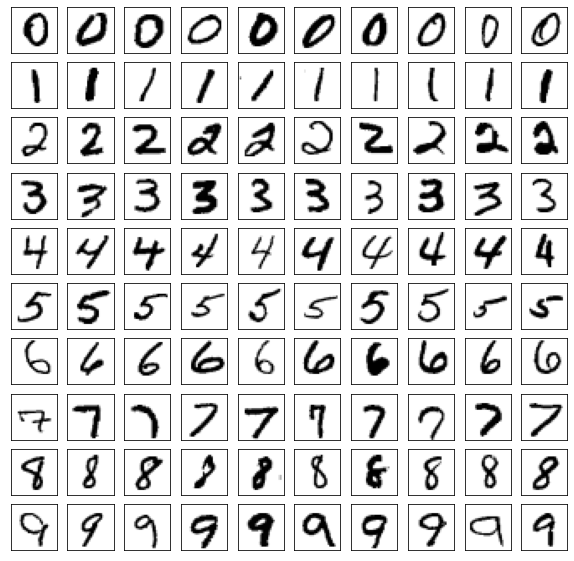

In [4]:
def visualize(X, Y, num_examples=10):

    """ sample 10 examples of each digit 
    10 x 10 grid
    x-axis and y-axis are hidden
    """
    size = int(np.sqrt(X.shape[1])) #28 x 28
    digits = np.unique(Y)

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(10, 10))

    for i ,d in enumerate(digits):
        for j in range(num_examples):
            ax_array[i, j].imshow(X[Y==d][j].reshape((size, size)),
                                   cmap= plt.cm.binary) 
            plt.xticks(np.array([]))  #remove the ticks
            plt.yticks(np.array([])) 


visualize(X, Y, 10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

test accuracy when k ∈  [1,3,5,7,9]: [0.884, 0.876, 0.882, 0.877, 0.875]


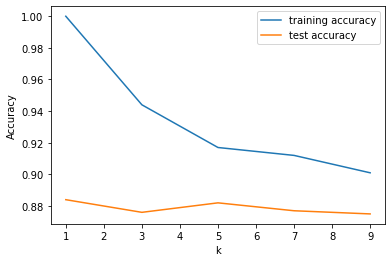

In [5]:
def P2(k_values):

    training_accuracy = []
    test_accuracy = []

    for i in k_values:
        clf =  KNeighborsClassifier(n_neighbors = i)
        clf.fit(mini_train_data, mini_train_labels) #fit the training data
        
        training_accuracy.append(clf.score(mini_train_data, mini_train_labels))
        test_accuracy.append(clf.score(dev_data, dev_labels))
        
    return training_accuracy, test_accuracy
    

k_values = [1, 3, 5, 7, 9]
training_accuracy, test_accuracy = P2(k_values)

print(f"test accuracy when k ∈  [1,3,5,7,9]: {test_accuracy}")

# Plot the training accuracy vs test accuracy graph 
plt.plot(k_values, training_accuracy, label = "training accuracy")
plt.plot(k_values, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()


In [6]:
# show the precision, recall, and F1 for each label when k = 1
clf1 =  KNeighborsClassifier(n_neighbors = 1)
clf1.fit(mini_train_data, mini_train_labels)
dev_predict_K1 = clf1.predict(dev_data)

print(f"Classification report for classifier {clf1}:\n"f"{classification_report(dev_labels, dev_predict_K1)}\n")



Classification report for classifier KNeighborsClassifier(n_neighbors=1):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000




ANSWER: 
* Number 8 has the lowest f1-score, thus it is the most difficult for the 1-Nearest Neighbor model to recognize.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [7]:
def P3(train_sizes, accuracies, running_time):
    
    for i in train_sizes:
        # calculate the time in the begining of training models
        start = time.time()
        clf =  KNeighborsClassifier(n_neighbors = 1)
        clf.fit(train_data[0:i,:], train_labels[0:i])  #fit data with different training sizes
        accuracies.append(clf.score(dev_data, dev_labels))
        elapsed = time.time() - start
        running_time.append(round(elapsed, 2))
        
    print("train_sizes: ", train_sizes)
    print("accuracies: ", accuracies)
    print("running_time", running_time)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
running_time = []
P3(train_sizes, accuracies, running_time)

train_sizes:  [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies:  [0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]
running_time [0.2, 0.44, 0.88, 1.76, 3.13, 8.08, 11.68, 26.07, 55.22]


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Training set score R2 for linear regression: 0.42


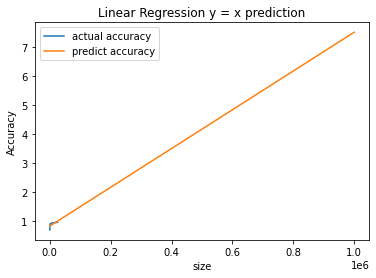

Training set score R2 for linear regression with log transformation: 0.94


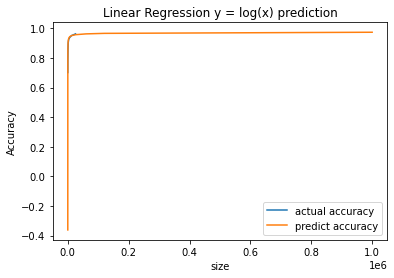

In [8]:
def P4():
    # linear regression 
    train_lr = np.array(train_sizes).reshape(-1,1)
    lr = LinearRegression().fit(train_lr, accuracies)

    print("Training set score R2 for linear regression: {:.2f}".format(lr.score(train_lr, accuracies)))
    
    # Predict the accuracy in linear regression 
    predict_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
    predict_lr = np.array(predict_sizes).reshape(-1,1)
    predict_accuracy = lr.predict(predict_lr)
    
    plt.plot(train_sizes, accuracies , label = "actual accuracy")
    plt.plot(predict_sizes, predict_accuracy, label = "predict accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("size")
    plt.title("Linear Regression y = x prediction")
    plt.legend()
    plt.show()
    
    # Linear regression with log transformation
    odds_accuracies = [ y / (1-y) for y in accuracies ]
    log_lr = LinearRegression().fit(np.log(train_lr), odds_accuracies)
    print("Training set score R2 for linear regression with log transformation: {:.2f}".format(log_lr.score(np.log(train_lr), odds_accuracies)))
    
    # Predict the accuracy in linear regression with log transformation
    predict_accuracy_log = log_lr.predict(np.log(predict_lr))
    predict_accuracy_log = [ y / (1+y) for y in predict_accuracy_log ]
    
    plt.plot(train_sizes, accuracies , label = "actual accuracy")
    plt.plot(predict_sizes, predict_accuracy_log, label = "predict accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("size")
    plt.title("Linear Regression y = log(x) prediction")
    plt.legend()
    plt.show()

P4()

ANSWER: 
* The relationship between training size and accuracy is not linear, as we know that the accuracy should not be increased infinityly with the increase of the training size. It has to have an upper bound, such as 100% accuracy. 
* Plot 1 shows that the predicted accuracy is over 7 while it is not realistic. 
* Plot 2 shows the upper bound which fit the practical situation more. 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


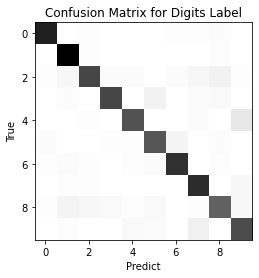

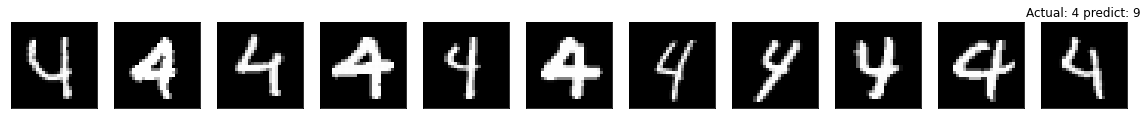

In [9]:
def P5():
    #1-Nearest Neighbor model
    clf1 =  KNeighborsClassifier(n_neighbors = 1)
    
    #train on mini train set
    clf1.fit(mini_train_data, mini_train_labels) 
    
    # evaluate on the dev set
    dev_predict_K1 = clf1.predict(dev_data)
    
    # print out the confusion matrix
    conf = confusion_matrix(dev_labels, dev_predict_K1)
    print(conf)
    
    # visualize the confusion matrix
    plt.imshow(conf, cmap='binary', interpolation='None')
    plt.xlabel("Predict")
    plt.ylabel("True")
    plt.title("Confusion Matrix for Digits Label")
    plt.show()
    
    # get the index of the most mislabeled pair (4, 9)
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(dev_labels, dev_predict_K1):
        if label == "4" and predict == "9": 
            misclassifiedIndexes.append(index)
        index +=1
        
    # visualized all mislabeled pair (truth: 4 predict: 9)
    plt.figure(figsize=(20,11))
    for plotIndex, badIndex in enumerate(misclassifiedIndexes):
        plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
        plt.imshow(np.reshape(dev_data[badIndex], (28,28)), cmap=plt.cm.gray)
        plt.xticks(np.array([]))  #remove the ticks
        plt.yticks(np.array([]))
    plt.title ("Actual: 4 predict: 9", loc = "center")

P5()

ANSWER: 

* As the confusion matrix indicates, digit 4 gets the highest mislabeled number. Eleven digit 4 are mislabeled as 9 in the dev data set. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [10]:
#  generate a (2k+1)x(2k+1) gaussian kernel with mean=0 and sigma = s
def Gaussian_Blur(X, s = 0.3, k= 1):
    # generate gaussian kernel
    probs = [np.exp(-z*z/(2*s*s))/np.sqrt(2*np.pi*s*s) for z in range(-k,k+1)]
    kernel = np.outer(probs, probs)
    
    image_row, image_col = X.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(X.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image.shape
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = X
 
    # apply gaussian kernel to image
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
    
    return output
    
#Do not use the filter

clf_no_filter =  KNeighborsClassifier(n_neighbors = 1)
clf_no_filter.fit(mini_train_data, mini_train_labels)
score1 = clf_no_filter.score(dev_data, dev_labels)

print("Accuracy of the 1-Nearest Neighbor models without filters: ", score1)

#Filter the training data but not the dev data

clf_filter_training =  KNeighborsClassifier(n_neighbors = 1)
clf_filter_training.fit(Gaussian_Blur(mini_train_data), mini_train_labels)
score2 = clf_filter_training.score(dev_data, dev_labels)

print("Accuracy of the 1-Nearest Neighbor models filter the training data but not the dev data: ", score2)
# Filter the dev data but not the training data
clf_filter_dev =  KNeighborsClassifier(n_neighbors = 1)
clf_filter_dev.fit(mini_train_data, mini_train_labels)
score3 = clf_filter_dev.score(Gaussian_Blur(dev_data), dev_labels)

print("Accuracy of the 1-Nearest Neighbor models filter the dev data but not the training data: ", score3)

# Filter both training data and dev data
clf_filter_both =  KNeighborsClassifier(n_neighbors = 1)
clf_filter_both.fit(Gaussian_Blur(mini_train_data), mini_train_labels)
score4 = clf_filter_both.score(Gaussian_Blur(dev_data), dev_labels)

print("Accuracy of the 1-Nearest Neighbor models filter both training data and dev data: ", score4)


Accuracy of the 1-Nearest Neighbor models without filters:  0.884
Accuracy of the 1-Nearest Neighbor models filter the training data but not the dev data:  0.671
Accuracy of the 1-Nearest Neighbor models filter the dev data but not the training data:  0.89
Accuracy of the 1-Nearest Neighbor models filter both training data and dev data:  0.885


ANSWER: 
* KNN model with K = 1 is easily overfitting. Applying Gaussian blur here means that we reduced the variance of our image data.
* Applying Gaussian blur made the model generalize better, and avoid overfitting.  

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [11]:
def P7():

    # binary pixel naive bayes model
    mini_train_binary = np.where(mini_train_data>0.1, 1, 0)
    clf_binary = BernoulliNB()
    clf_binary.fit(mini_train_binary, mini_train_labels)
    clf_binary.score(dev_data, dev_labels)
    print("binary pixel naive bayes model accuracy rate: " + str(clf_binary.score(dev_data, dev_labels)))

    # multivariate pixel naive bayes model
    bins = np.array([0.1, 0.9])
    mini_train_multi = np.digitize(mini_train_data, bins)
    clf_multi = MultinomialNB()
    clf_multi.fit(mini_train_multi, mini_train_labels)
    clf_multi.score(dev_data, dev_labels)
    print("multivariate pixel naive bayes model accuracy rate: " + str(clf_multi.score(dev_data, dev_labels)))



P7()

binary pixel naive bayes model accuracy rate: 0.816
multivariate pixel naive bayes model accuracy rate: 0.807


ANSWER: 
* The accuracy of multivariate pixel naive bayes model is lower than the binary pixel naive bayes model. 
* We increased the complexity from binary to multivariate, but the accuracy decreased. It means that we might overfit our data.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [12]:
def P8(alphas):

    #Set binarization threshold to 0
    model = BernoulliNB()
    grid = GridSearchCV(estimator = model, param_grid = alphas)
    # By default, the GridSearchCV uses a 5-fold cross-validation.
    grid.fit(mini_train_data, mini_train_labels)
    return grid



alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)
#result score: array([0.814, 0.819, 0.825, 0.822, 0.818, 0.813, 0.809, 0.805, 0.783])


Best alpha =  {'alpha': 0.001}


ANSWER: 
* The best alpha is 0.001 for the set of provided alphas. 
* The accuracy is 0.814 when alpha is near 0. 
* I am not quite sure about the units here. As I know that in practice, alpha is usually one. While we normalize the data here, the unit is much smaller. I expected that alpha will be small, but not sure how small it will be. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [13]:
def P9():
    
    clf_GNB = GaussianNB()
    clf_GNB.fit(mini_train_data, mini_train_labels)
    score1 = clf_GNB.score(dev_data, dev_labels)
    print ("Guassian Naive Bayes Score: ", score1)

    clf_GNB_fix = GaussianNB(var_smoothing = 0.1)
    clf_GNB_fix.fit(mini_train_data, mini_train_labels)
    score2 = clf_GNB_fix.score(dev_data, dev_labels)
    print ("Guassian Naive Bayes Score after smoothing: ", score2)


P9()

Guassian Naive Bayes Score:  0.593
Guassian Naive Bayes Score after smoothing:  0.817


ANSWER:
* Gaussian Navie Bayes takes the real values and applied normal distribution to the probablity. In this dataset, we have lots of zeros and ones while other values have smaller differences. 
* Originally Gaussian navie bayes might be impacted by two edges (zeros and ones). By adding more variance to the dataset, it helps the normal distribution less focus to zeros and ones, abd become better recognize the pattern. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

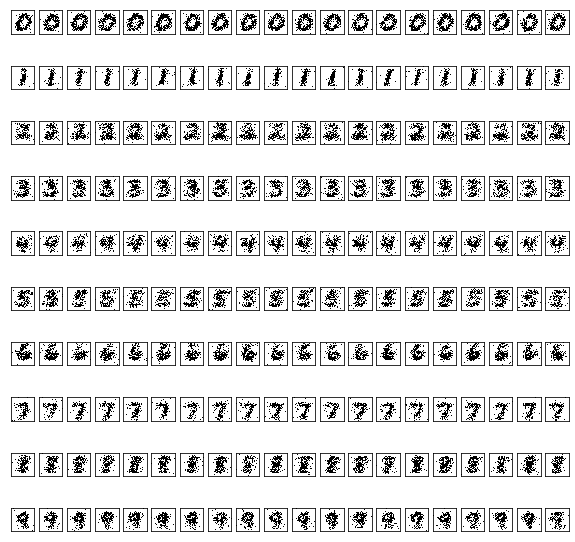

In [14]:
def P10(num_examples):

    clf_BNB = BernoulliNB()
    clf_BNB.fit(mini_train_data, mini_train_labels)
    prob = np.exp(clf_BNB.feature_log_prob_)
    
    # generate random numbers for image 
    rows = num_examples * 10
    pixel = np.random.rand(rows, 784)
    
    # compare the random numbers with probablity and turn it to 0 or 1
    for d in range(10):
        for i in range(20):
            for j in range(pixel.shape[1]):
                pixel[20*d + i, j] = np.where(pixel[20*d + i, j] < prob[d, j], 1, 0)
    
    # plot the images
    fig, ax_array = plt.subplots(nrows=10, ncols=20, sharey=True, sharex=True, figsize=(10, 10))
    for r in range(10):
        for c in range(20):
            ax_array[r, c].matshow(pixel[20 * r + c].reshape((28, 28)), cmap=plt.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([])) 
    

P10(20)

ANSWER: 
* The generated numbers has more noise compared to the training digits. 
* The generated numbers are based on a randomly generated numbers from 0 to 1, some pixles might be mis-categorized into 0 or 1. That is why the noise is higher. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [15]:
def P11(buckets, correct, total):


    clf_BNB = BernoulliNB(alpha = 0.001)
    clf_BNB.fit(mini_train_data, mini_train_labels)
    dev_predict = clf_BNB.predict(dev_data)
    
    # find the confidence of predicted class 
    confidence = []
    for index in range(dev_data.shape[0]):
        confidence.append(np.max(clf_BNB.predict_proba(dev_data)[index]))

    bin_confidence = np.digitize(confidence, buckets, right = True)
    
    # total: total numbers in the bucket
    # correct: numbers in the bucket when the predict label is the same as the actual label
    for j in range(1, len(buckets)+1):
        for i in range(len(bin_confidence)):
            if bin_confidence[i]==j:
                total[j-1] +=1
                if dev_predict[i] == dev_labels[i]:
                    correct[j-1] +=1

    return correct, total

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
     accuracy = 0.0
     if (total[i] > 0): accuracy = correct[i] / total[i]
     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  31    accuracy = 0.355
p(pred) is 0.5000000000000 to 0.9000000000000    total =  67    accuracy = 0.433
p(pred) is 0.9000000000000 to 0.9990000000000    total =  59    accuracy = 0.458
p(pred) is 0.9990000000000 to 0.9999900000000    total =  46    accuracy = 0.652
p(pred) is 0.9999900000000 to 0.9999999000000    total =  62    accuracy = 0.774
p(pred) is 0.9999999000000 to 0.9999999990000    total =  33    accuracy = 0.788
p(pred) is 0.9999999990000 to 0.9999999999900    total =  43    accuracy = 0.791
p(pred) is 0.9999999999900 to 0.9999999999999    total = 659    accuracy = 0.938
p(pred) is 0.9999999999999 to 1.0000000000000    total =   0    accuracy = 0.000


### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [16]:
def P12():

    #sum the pixel values in each row for training and dev dataset
    sum_row_train = np.sum(mini_train_data, axis = 1)
    sum_row_dev = np.sum(dev_data, axis = 1)

    # original Bernoulli Navie Bayes Model 
    clf_BNB = BernoulliNB(alpha = 0.001)
    clf_BNB.fit(mini_train_data, mini_train_labels)
    score1 = clf_BNB.score(dev_data, dev_labels)
    print("Accuracy of original Bernoulli Navie Bayes: ", score1)

    # few feature model: sum the pixel values in each row
    clf_BNB_new = BernoulliNB(alpha = 0.001)
    clf_BNB_new.fit(sum_row_train.reshape(-1,1), mini_train_labels)
    score2 = clf_BNB_new.score(sum_row_train.reshape(-1,1), dev_labels)
    print("Accuracy of 'sum each row' Bernoulli Navie Bayes: ", score2)

### STUDENT END ###

P12()

Accuracy of original Bernoulli Navie Bayes:  0.823
Accuracy of 'sum each row' Bernoulli Navie Bayes:  0.094


Answer: 
* New feature (sum the pixel values in each row) could not improve the accuracy of the Bernoulli Naive Bayes model. 